Total data = 3
Jumper's mass (in kg) = 60
Jumper's height (in m) = 0
The most apropriate spring constant (in N/m) =  36

Jumper's mass (in kg) = 70
Jumper's height (in m) = 0
The most apropriate spring constant (in N/m) =  43

Jumper's mass (in kg) = 80
Jumper's height (in m) = 0
The most apropriate spring constant (in N/m) =  49



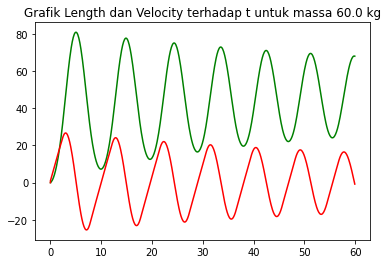

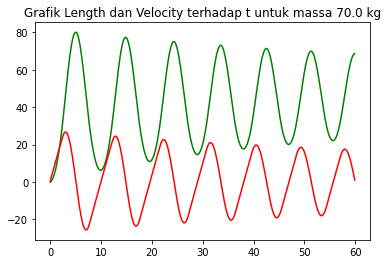

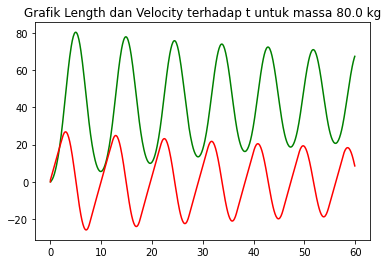

In [1]:
# Program ini pada mulanya menetapkan spring constant (k) yang besar sehingga displacement-nya kecil
# Program kemudian mengurangi spring constant-nya secara looping
# Kemudian ditampilkan spring constant yang paling dekat tapi tidak melebihi tinggi jembatan (80 m)
# Length maximum-nya adalah 80 m dikurangi tinggi orang yang melompat
# Ditampilkan juga grafik dari panjang tali dan kecepatan-nya menggunakan spring constant yang sesuai

import matplotlib.pyplot as plt

total_data = int(input("Total data = "))

t_data = [[0] for i in range (total_data+1)]
length_data = [[0] for i in range (total_data+1)]
velocity_data = [[0] for i in range (total_data+1)]
        
for i in range (1,total_data+1):
    mass = float(input("Jumper's mass (in kg) = "))
    height = float(input("Jumper's height (in m) = "))
    spring_constant = 100 # N/m
    acceleration_due_to_gravity = 9.81 # m/s^2
    unweighted_length = 30 # m
    projected_area = 0.1 # m^2
    maximum_length = 0 # m

    while maximum_length < (80-height):
        velocity = 0
        length = 0
        weight = mass*acceleration_due_to_gravity
        weight_displacement = weight/spring_constant
        spring_constant = spring_constant - 1
        simulation_time = 60 # s
        delta_t = 0.1 # s
        
        t_data[i]=[0]
        length_data[i] = [0]
        velocity_data[i] = [0]

        for j in range (int(simulation_time/delta_t)):
            air_friction = -0.65*projected_area*velocity*abs(velocity)
            if (length>unweighted_length):
                restoring_spring_force = -spring_constant*(length - unweighted_length)
            else:
                restoring_spring_force = 0
            total_force = weight + restoring_spring_force + air_friction
            acceleration = total_force/mass
            velocity = velocity + acceleration*delta_t
            length = length + velocity*delta_t
            if length > maximum_length:
                maximum_length = length

            t_data[i].append(delta_t*j)
            length_data[i].append(length)
            velocity_data[i].append(velocity)

    print("The most apropriate spring constant (in N/m) = ",spring_constant + 1)
    print()

    fig, ax = plt.subplots()
    ax.set_title("Grafik Length dan Velocity terhadap t untuk massa "+str(mass)+" kg")
    ax.plot(t_data[i], length_data[i], color='green')
    ax.plot(t_data[i], velocity_data[i], color='red')